In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Using cached yfinance-0.2.37-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.0.tar.gz (314 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached peewee-3.17.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml):

[*********************100%%**********************]  1 of 1 completed


Total Return: 0.25%
Sharpe Ratio: 0.19
Max Drawdown: 3.60%


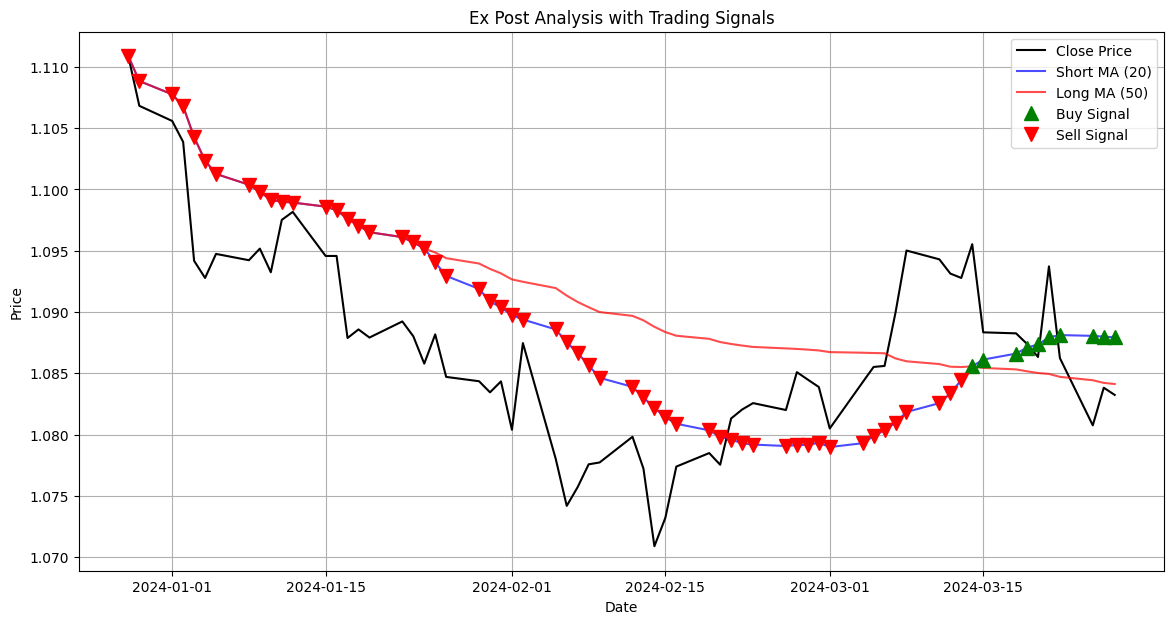

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the currency pair
currency_pair = 'EURUSD=X'

# Get historical data for the past 3 months
historical_data = yf.download(currency_pair, start='2023-12-28', end='2024-03-28')

# Ensure 'Close' column is numeric
historical_data['Close'] = pd.to_numeric(historical_data['Close'])

# Now, implement the trading strategy outlined earlier using this historical data
# Calculate short-term and long-term moving averages
short_window = 20  # Short-term moving average window
long_window = 50   # Long-term moving average window

historical_data['Short_MA'] = historical_data['Close'].rolling(window=short_window, min_periods=1).mean()
historical_data['Long_MA'] = historical_data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals based on moving average crossovers
historical_data['Signal'] = np.where(historical_data['Short_MA'] > historical_data['Long_MA'], 1, -1)

# Calculate returns based on trading signals
historical_data['Returns'] = historical_data['Close'].pct_change() * historical_data['Signal'].shift(1)

# Backtest performance metrics
total_return = historical_data['Returns'].sum()
sharpe_ratio = historical_data['Returns'].mean() / historical_data['Returns'].std() * np.sqrt(252)
max_drawdown = (1 - historical_data['Close'] / historical_data['Close'].cummax()).max()

# Print performance metrics
print("Total Return: {:.2%}".format(total_return))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))
print("Max Drawdown: {:.2%}".format(max_drawdown))

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Close'], label='Close Price', color='black')
plt.plot(historical_data.index, historical_data['Short_MA'], label='Short MA (20)', color='blue', alpha=0.7)
plt.plot(historical_data.index, historical_data['Long_MA'], label='Long MA (50)', color='red', alpha=0.7)

# Marking buy and sell signals
plt.plot(historical_data[historical_data['Signal'] == 1].index, 
         historical_data['Short_MA'][historical_data['Signal'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(historical_data[historical_data['Signal'] == -1].index, 
         historical_data['Short_MA'][historical_data['Signal'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Ex Post Analysis with Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


Import Libraries:

yfinance: This library is used to fetch historical financial data from Yahoo Finance.
pandas: Used for data manipulation and analysis.
numpy: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.
matplotlib.pyplot: A plotting library used to create static, animated, and interactive visualizations in Python.
Define Currency Pair:

currency_pair = 'EURUSD=X': Specifies the currency pair for which historical data will be retrieved. In this case, it's Euro to US Dollar.
Fetch Historical Data:

yf.download(currency_pair, start='2023-12-28', end='2024-03-28'): Retrieves historical data for the specified currency pair from Yahoo Finance for the given time period (from December 28, 2023, to March 28, 2024).
Data Preprocessing:

pd.to_numeric(): Converts the 'Close' column of the DataFrame to numeric format, ensuring it can be used for calculations.
Moving Averages Calculation:

Two moving averages are calculated:
Short-term moving average (20-day): Smooths out short-term fluctuations to identify trends.
Long-term moving average (50-day): Smooths out long-term fluctuations to identify broader trends.
These moving averages are calculated using the rolling() function along with the mean() method.
Generate Trading Signals:

Trading signals are generated based on the crossover of the short-term and long-term moving averages.
When the short-term moving average crosses above the long-term moving average, it's considered a buy signal (marked as 1).
When the short-term moving average crosses below the long-term moving average, it's considered a sell signal (marked as -1).
This is done using NumPy's where() function.
Plotting:

The historical closing prices, short-term moving average, and long-term moving average are plotted against time using plt.plot().
Buy signals (when the short-term MA crosses above the long-term MA) are marked with green triangles (^).
Sell signals (when the short-term MA crosses below the long-term MA) are marked with red inverted triangles (v).
Titles, labels, legends, and gridlines are added to the plot for better readability.
This process visually represents the historical data and trading signals, aiding in the analysis of potential buy and sell opportunities based on moving average crossovers.

experimenting for longer term

[*********************100%%**********************]  1 of 1 completed


Total Return: -10.51%
Sharpe Ratio: -1.15
Max Drawdown: 6.81%


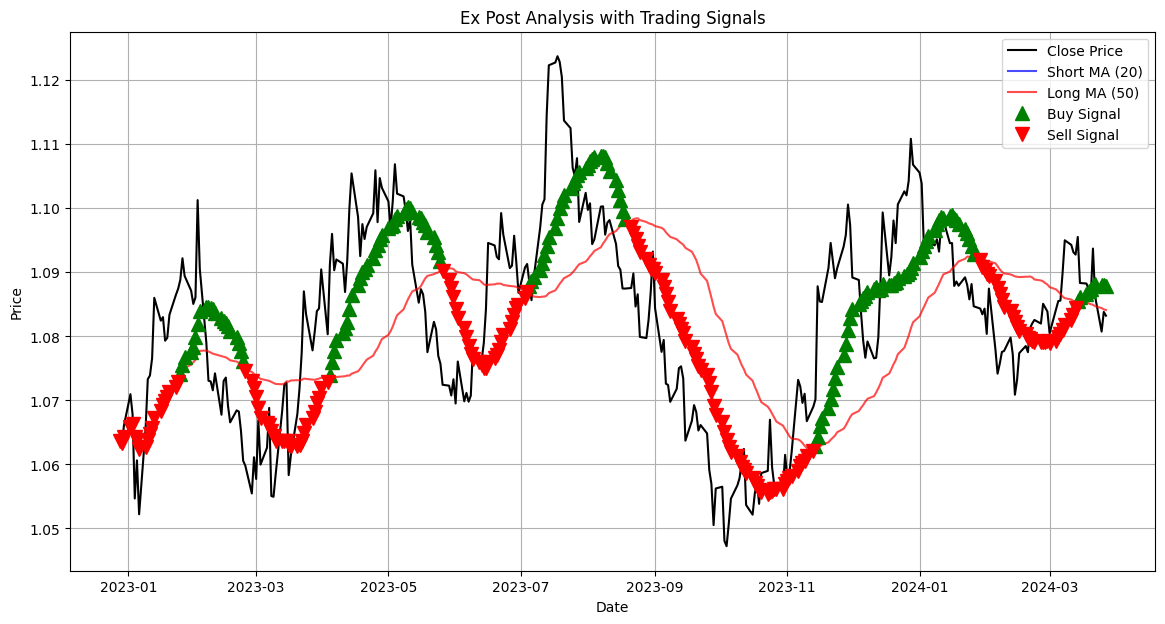

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the currency pair
currency_pair = 'EURUSD=X'

# Get historical data for the past 3 months
historical_data = yf.download(currency_pair, start='2022-12-28', end='2024-03-28')

# Ensure 'Close' column is numeric
historical_data['Close'] = pd.to_numeric(historical_data['Close'])

# Now, you can implement the trading strategy outlined earlier using this historical data
# Calculate short-term and long-term moving averages
short_window = 20  # Short-term moving average window
long_window = 50   # Long-term moving average window

historical_data['Short_MA'] = historical_data['Close'].rolling(window=short_window, min_periods=1).mean()
historical_data['Long_MA'] = historical_data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals based on moving average crossovers
historical_data['Signal'] = np.where(historical_data['Short_MA'] > historical_data['Long_MA'], 1, -1)

# Calculate returns based on trading signals
historical_data['Returns'] = historical_data['Close'].pct_change() * historical_data['Signal'].shift(1)

# Backtest performance metrics
total_return = historical_data['Returns'].sum()
sharpe_ratio = historical_data['Returns'].mean() / historical_data['Returns'].std() * np.sqrt(252)
max_drawdown = (1 - historical_data['Close'] / historical_data['Close'].cummax()).max()

# Print performance metrics
print("Total Return: {:.2%}".format(total_return))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))
print("Max Drawdown: {:.2%}".format(max_drawdown))

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Close'], label='Close Price', color='black')
plt.plot(historical_data.index, historical_data['Short_MA'], label='Short MA (20)', color='blue', alpha=0.7)
plt.plot(historical_data.index, historical_data['Long_MA'], label='Long MA (50)', color='red', alpha=0.7)

# Marking buy and sell signals
plt.plot(historical_data[historical_data['Signal'] == 1].index, 
         historical_data['Short_MA'][historical_data['Signal'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(historical_data[historical_data['Signal'] == -1].index, 
         historical_data['Short_MA'][historical_data['Signal'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Ex Post Analysis with Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


dynamically displaying


In [8]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB 960.0 kB/s eta 0:00:17
   - -------------------------------------- 0.4/15.7 MB 4.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/15.7 MB 6.5 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/15.7 MB 7.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.9/15.7 MB 8.8 MB/s eta 0:00:02
   ------ --------------------------------- 2.7/15.7 MB 10.0 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.7 MB 10.7 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/15.7 MB 11.5 MB/s eta 0:00:01
   ------------ --------------------------- 5.1/15.7 MB 13.0 MB/s eta 0:00:01
   --------------- ------------------------ 6.0/15.7 MB 13.7 MB/s eta 0:00:01
   ----------------- ---------------------- 7.1/15.7 MB 14.5 MB/s eta 0:00:

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Define the currency pair
currency_pair = 'EURUSD=X'

# Get historical data for the past 3 months
historical_data = yf.download(currency_pair, start='2022-12-28', end='2024-03-28')

# Ensure 'Close' column is numeric
historical_data['Close'] = pd.to_numeric(historical_data['Close'])

# Now, you can implement the trading strategy outlined earlier using this historical data
# Calculate short-term and long-term moving averages
short_window = 20  # Short-term moving average window
long_window = 50   # Long-term moving average window

historical_data['Short_MA'] = historical_data['Close'].rolling(window=short_window, min_periods=1).mean()
historical_data['Long_MA'] = historical_data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals based on moving average crossovers
historical_data['Signal'] = np.where(historical_data['Short_MA'] > historical_data['Long_MA'], 1, -1)

# Create figure
fig = go.Figure()

# Plot close price
fig.add_trace(go.Scatter(x=historical_data.index, y=historical_data['Close'], mode='lines', name='Close Price'))

# Plot short-term and long-term moving averages
fig.add_trace(go.Scatter(x=historical_data.index, y=historical_data['Short_MA'], mode='lines', name='Short MA (20)'))
fig.add_trace(go.Scatter(x=historical_data.index, y=historical_data['Long_MA'], mode='lines', name='Long MA (50)'))

# Marking buy and sell signals
buy_signals = historical_data[historical_data['Signal'] == 1]
sell_signals = historical_data[historical_data['Signal'] == -1]

fig.add_trace(go.Scatter(x=buy_signals.index, y=buy_signals['Short_MA'], mode='markers', marker=dict(symbol='triangle-up', size=10, color='green'), name='Buy Signal'))
fig.add_trace(go.Scatter(x=sell_signals.index, y=sell_signals['Short_MA'], mode='markers', marker=dict(symbol='triangle-down', size=10, color='red'), name='Sell Signal'))

# Update layout
fig.update_layout(title='Ex Post Analysis with Trading Signals', xaxis_title='Date', yaxis_title='Price', legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

# Show plot
fig.show()


[*********************100%%**********************]  1 of 1 completed

candle chart

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objs as go

# Define the currency pair
currency_pair = 'EURUSD=X'

# Get historical data for the past 3 months
historical_data = yf.download(currency_pair, start='2022-12-28', end='2024-03-28')

# Ensure 'Close' column is numeric
historical_data['Close'] = pd.to_numeric(historical_data['Close'])

# Now, you can implement the trading strategy outlined earlier using this historical data
# Calculate short-term and long-term moving averages
short_window = 20  # Short-term moving average window
long_window = 50   # Long-term moving average window

historical_data['Short_MA'] = historical_data['Close'].rolling(window=short_window, min_periods=1).mean()
historical_data['Long_MA'] = historical_data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals based on moving average crossovers
historical_data['Signal'] = np.where(historical_data['Short_MA'] > historical_data['Long_MA'], 1, -1)

# Create figure
fig = go.Figure()

# Plot close price
fig.add_trace(go.Scatter(x=historical_data.index, y=historical_data['Close'], mode='lines', name='Close Price'))

# Plot short-term and long-term moving averages
fig.add_trace(go.Scatter(x=historical_data.index, y=historical_data['Short_MA'], mode='lines', name='Short MA (20)'))
fig.add_trace(go.Scatter(x=historical_data.index, y=historical_data['Long_MA'], mode='lines', name='Long MA (50)'))

# Marking buy and sell signals
buy_signals = historical_data[historical_data['Signal'] == 1]
sell_signals = historical_data[historical_data['Signal'] == -1]

fig.add_trace(go.Scatter(x=buy_signals.index, y=buy_signals['Short_MA'], mode='markers', marker=dict(symbol='triangle-up', size=10, color='green'), name='Buy Signal'))
fig.add_trace(go.Scatter(x=sell_signals.index, y=sell_signals['Short_MA'], mode='markers', marker=dict(symbol='triangle-down', size=10, color='red'), name='Sell Signal'))

# Add candlestick chart
fig.add_trace(go.Candlestick(x=historical_data.index,
                open=historical_data['Open'],
                high=historical_data['High'],
                low=historical_data['Low'],
                close=historical_data['Close'],
                name='Candlestick'))

# Update layout
fig.update_layout(title='Ex Post Analysis with Trading Signals and Candlestick Chart', xaxis_title='Date', yaxis_title='Price', legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

# Show plot
fig.show()


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

Epoch 1/100



C:\Users\wjbea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2289
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0997
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0443
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0289
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0230
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0217
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0185
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0170
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0144
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0133
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0136
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0132
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0114
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0107
E

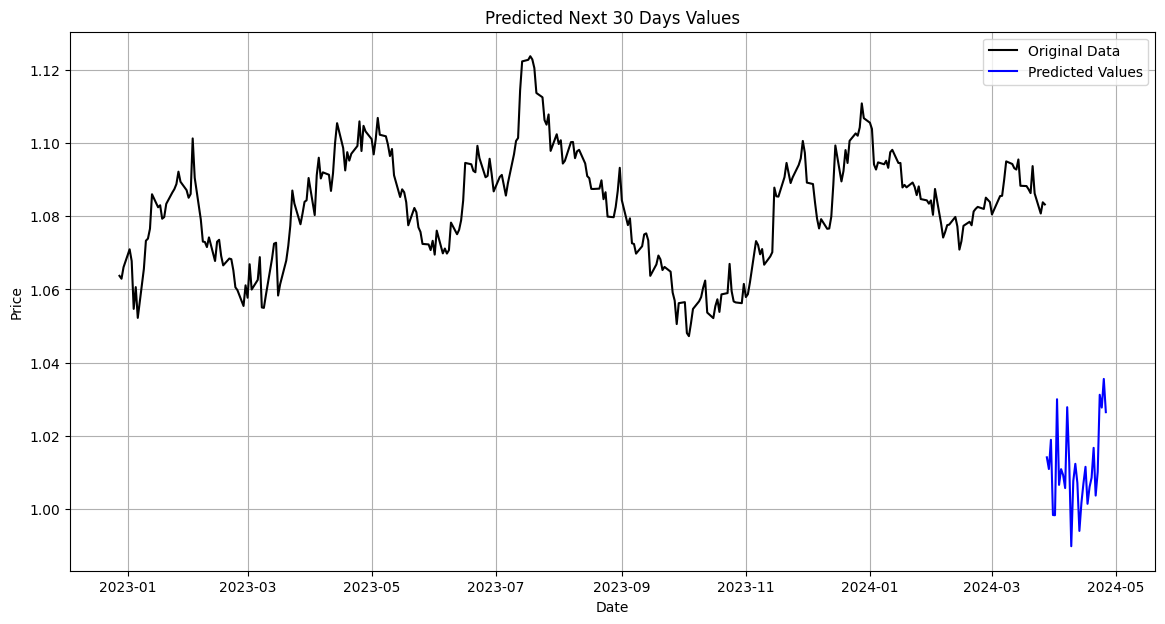

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the currency pair
currency_pair = 'EURUSD=X'

# Get historical data for the past 3 months
historical_data = yf.download(currency_pair, start='2022-12-28', end='2024-03-28')

# Ensure 'Close' column is numeric
historical_data['Close'] = pd.to_numeric(historical_data['Close'])

# Prepare data
data = historical_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define function to create dataset
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Create dataset with 30 time steps
time_steps = 30
X, y = create_dataset(scaled_data, time_steps)

# Reshape data for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Reshape target values for LSTM output
y = y.reshape(-1, 1)
y = np.repeat(y, 30, axis=1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=30))  # Output layer with 30 units for next 30 days
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X, y, epochs=100, batch_size=32)

# Make predictions for next 30 days
inputs = scaled_data[-time_steps:].reshape(-1, 1)  # Reshape to have 1 feature
inputs = scaler.transform(inputs)

X_test = []
X_test.append(inputs)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_values_scaled = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values_scaled)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(historical_data.index, historical_data['Close'], label='Original Data', color='black')

# Create date range for next 30 days
date_range_future = pd.date_range(start=historical_data.index[-1], periods=31, freq='D')[1:]  # Starting from tomorrow
plt.plot(date_range_future, predicted_values[0], label='Predicted Values', color='blue')

plt.title('Predicted Next 30 Days Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()



Data Preparation:

Download historical data for a specific currency pair ('EURUSD=X' in this case) using Yahoo Finance.
Convert the 'Close' prices to numeric format.
Normalize the data using MinMaxScaler to scale the values between 0 and 1, which helps the neural network converge faster during training.
Dataset Creation:

Create a dataset suitable for training a recurrent neural network (RNN), specifically a Long Short-Term Memory (LSTM) network.
Define a function create_dataset to create input-output pairs for the LSTM model.
Each input sequence consists of the closing prices for a specified number of time steps (in this case, 30 days), and the corresponding output is the next day's closing price.
Reshape the input data to match the LSTM input shape (samples, time_steps, features).
Model Architecture:

Build an LSTM model using TensorFlow's Keras API.
The model consists of two LSTM layers followed by a dense layer with 30 units (for predicting the next 30 days' values).
Use the Adam optimizer and mean squared error loss function for compilation.
Model Training:

Train the LSTM model on the prepared dataset.
Fit the model to the training data with a specified number of epochs and batch size.
Making Predictions:

Take the most recent 30 days' closing prices from the historical data as input.
Reshape and normalize the input data to match the expected input shape of the LSTM model.
Use the trained model to predict the next 30 days' closing prices.
Plotting:

Plot the original closing prices from the historical data.
Plot the predicted closing prices for the next 30 days on the same plot.
Show the plot to visualize the predicted values alongside the historical data.
This strategy involves training an LSTM neural network on historical closing prices to learn patterns and relationships in the data. Then, the trained model is used to make predictions for future closing prices. The predictions are plotted to visually assess the model's performance and compare predicted values with actual historical data.